<a href="https://colab.research.google.com/github/arindalestari/Belajar-Spark/blob/main/Latihan_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pemodelan Machine Learning dengan Spark**

# Masalah

> Memprediksi kemungkinan kelangsungan hidup penumpang manakah yang selamat atau tidak berdasarkan status sosial ekonomi, jenis kelamin, kelas tiket, dll.

# Sumber Data

> Dataset titanic merupakan Kumpulan data yang berisi informasi tentang penumpang kapal Titanic. Itu dibuat untuk menganalisis dan memahami faktor-faktor yang mempengaruhi tingkat kelangsungan hidup penumpang selama tenggelamnya RMS Titanic secara tragis pada tanggal 15 April 1912.

> Dataset tersebut diperoleh dari kaggle dengan klik [here](https://www.kaggle.com/datasets/sakshisatre/titanic-dataset). Harapannya project ini dapat sedikit membantu untuk mempelajari spark.


# Instalasi dan Konfigurasi


In [ ]:
# install spark
!pip install Pyspark

  Using cached pyspark-3.5.1.tar.gz (317.0 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for Pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=93c8f26e40f30b8f91dccdbb60a8229394db286b00598622787c854169545517
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built Pyspark


# Inisialisasi Spark

Inisialisasi Spark digunakan untuk pemrosesan data.

In [ ]:
# start spark session
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()
spark

# Eksplorasi Analisis Data (EDA)



In [ ]:
# Mengimport file dari file eksternal yang sudah di download
from google.colab import files

uploaded = files.upload()

Saving Titanic Dataset.csv to Titanic Dataset.csv


In [ ]:
# Read titanic dataset
df = spark.read.csv("/content/Titanic Dataset.csv", header=True, inferSchema=True)

# Menampilkan 5 baris pertama dari DataFrame
df.show(5)

+------+--------+--------------------+------+----+-----+-----+------+--------+-------+--------+----+----+--------------------+
|pclass|survived|                name|   sex| age|sibsp|parch|ticket|    fare|  cabin|embarked|boat|body|           home.dest|
+------+--------+--------------------+------+----+-----+-----+------+--------+-------+--------+----+----+--------------------+
|     1|       1|Allen, Miss. Elis...|female|29.0|    0|    0| 24160|211.3375|     B5|       S|   2|NULL|        St Louis, MO|
|     1|       1|Allison, Master. ...|  male|0.92|    1|    2|113781|  151.55|C22 C26|       S|  11|NULL|Montreal, PQ / Ch...|
|     1|       0|Allison, Miss. He...|female| 2.0|    1|    2|113781|  151.55|C22 C26|       S|NULL|NULL|Montreal, PQ / Ch...|
|     1|       0|Allison, Mr. Huds...|  male|30.0|    1|    2|113781|  151.55|C22 C26|       S|NULL| 135|Montreal, PQ / Ch...|
|     1|       0|Allison, Mrs. Hud...|female|25.0|    1|    2|113781|  151.55|C22 C26|       S|NULL|NULL|Montre

> Informasi Variabel

1. Pclass: Kelas tiket yang menunjukkan status sosial ekonomi penumpang. Dikategorikan menjadi tiga kelas: 1 = Atas, 2 = Tengah, 3 = Bawah.

2. Survived: Indikator biner yang menunjukkan apakah penumpang selamat (1) atau tidak (0) selama bencana Titanic. Ini adalah variabel target untuk analisis.

3. Name: Nama lengkap penumpang, termasuk gelar (misalnya Tuan (Mr.), Nyonya(Mrs.), dll.).

4. Sex: Jenis kelamin penumpang, yang dinyatakan sebagai laki-laki atau perempuan.

5. Age: Usia penumpang dalam tahun.

6. SibSp: Jumlah saudara kandung atau pasangan di kapal Titanic untuk masing-masing penumpang.

7. Parch: Jumlah orang tua atau anak di kapal Titanic untuk masing-masing penumpang.

8. Ticket: Nomor tiket yang diberikan kepada penumpang.

9. Fare: Tarif yang dibayarkan oleh penumpang untuk tiket.

10. Cabin: Nomor kabin yang diberikan kepada penumpang, jika tersedia.

11. Embarked: Pelabuhan pemberangkatan penumpang. Ini dapat mengambil salah satu dari tiga nilai: C = Cherbourg, Q = Queenstown, S = Southampton.

12. Boat: Jika penumpang selamat, kolom ini berisi identitas sekoci tempat mereka diselamatkan.

13. Body: Jika penumpang tidak selamat, kolom ini berisi nomor identifikasi jenazah yang ditemukan, jika ada.

14. Home.dest : Tujuan atau tempat tinggal penumpang.

In [ ]:
# Menghitung jumlah baris dan kolom pada dataset
row = df.count()
column = len(df.columns)

print(f"Total baris:{row}", f"Total kolom:{column}")

Total baris:1309 Total kolom:14


Dalam Titanic Dataset.csv tersebut, terdapat 14 kolom dan 1309 baris.

In [ ]:
# Melihat jenis data

df.printSchema()

root
 |-- pclass: integer (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: double (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: integer (nullable = true)
 |-- home.dest: string (nullable = true)



> Terdapat 5 tipe data integer, 7 string, dan 2 double. String adalah tipe data yang digunakan untuk menyimpan data teks bisa berupa kata, kalimat, atau teks. Integer adalah tipe data yang digunakan untuk menyimpan angka bilangan bulat berupa positif atau negatif. Double adalah tipe data yang digunakan untuk menyimpan data angka dengan titik desimal (floating-point numbers).

# Data Cleaning

> count and when digunakan untuk menghitung jumlah missing value (null atau NaN) di setiap kolom.



In [ ]:
df.na.fill('0').show()


+------+--------+--------------------+------+----+-----+-----+--------+--------+-------+--------+----+----+--------------------+
|pclass|survived|                name|   sex| age|sibsp|parch|  ticket|    fare|  cabin|embarked|boat|body|           home.dest|
+------+--------+--------------------+------+----+-----+-----+--------+--------+-------+--------+----+----+--------------------+
|     1|       1|Allen, Miss. Elis...|female|29.0|    0|    0|   24160|211.3375|     B5|       S|   2|NULL|        St Louis, MO|
|     1|       1|Allison, Master. ...|  male|0.92|    1|    2|  113781|  151.55|C22 C26|       S|  11|NULL|Montreal, PQ / Ch...|
|     1|       0|Allison, Miss. He...|female| 2.0|    1|    2|  113781|  151.55|C22 C26|       S|   0|NULL|Montreal, PQ / Ch...|
|     1|       0|Allison, Mr. Huds...|  male|30.0|    1|    2|  113781|  151.55|C22 C26|       S|   0| 135|Montreal, PQ / Ch...|
|     1|       0|Allison, Mrs. Hud...|female|25.0|    1|    2|  113781|  151.55|C22 C26|       S|

> Kegunaan fungsi describe() pada DataFrame untuk menghasilkan statistik deskriptif untuk kolom numerik sehingga tipe data yang didukung seperti integer, float atau double. Oleh karena itu, dipilihlah tipe data yang sesuai seperti sintaks berikut.

In [ ]:
column_types = {col_name: col_type for col_name, col_type in df.dtypes}
column_types


{'pclass': 'int',
 'survived': 'int',
 'name': 'string',
 'sex': 'string',
 'age': 'double',
 'sibsp': 'int',
 'parch': 'int',
 'ticket': 'string',
 'fare': 'double',
 'cabin': 'string',
 'embarked': 'string',
 'boat': 'string',
 'body': 'int',
 'home.dest': 'string'}

In [ ]:
selected_columns = [col_name for col_name, col_type in column_types.items() if col_type in ['int', 'double']]
selected_columns

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']

In [ ]:
df2 = df.select(*selected_columns)
df2.printSchema()

root
 |-- pclass: integer (nullable = true)
 |-- survived: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- fare: double (nullable = true)
 |-- body: integer (nullable = true)



# Statistika Deskriptif

In [ ]:
summary = df2.describe().show()
summary

+-------+------------------+-------------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|            pclass|           survived|               age|             sibsp|             parch|             fare|             body|
+-------+------------------+-------------------+------------------+------------------+------------------+-----------------+-----------------+
|  count|              1309|               1309|              1046|              1309|              1309|             1308|              121|
|   mean| 2.294881588999236| 0.3819709702062643|29.881137667304014|0.4988540870893812|0.3850267379679144|33.29547928134572|160.8099173553719|
| stddev|0.8378360189701272|0.48605517086648325| 14.41349321127133|1.0416583905961012|0.8655602753495143|51.75866823917421|97.69692199600308|
|    min|                 1|                  0|              0.17|                 0|                 0|              0.0|                1|
|    m

> Dari tabel diatas dapat disimpulkan bahwa orang yang berada di kejadian kapal titanic rata-rata umur 30 tahun dengan minimal umur penumpang 17 tahun dan maksimal umur penumpang 80 tahun. Maksimal penumpang dengan membawa keluarganya 9 orang dengan tarif yang dibayarkan penumpang untuk mendapatkan tiket rata-rata sebesar 33.2 p (mata uang inggris).

# Visualisasi Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengubah Dataframe pyspark ke pandas untuk menggunakan seaborn
pandas_df = df.select("sex", "survived").toPandas()


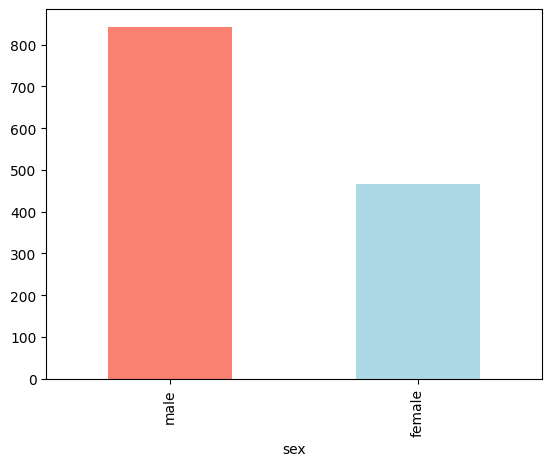

In [ ]:
# Melihat seberapa banyak penumpang berdasarkan gender
pandas_df["sex"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);


Pada diagram batang diatas, menunjukan bahwa kebanyakan penumpang kapal titanic terbanyak berjenis kelamin laki-laki.

In [ ]:
import pandas as pd

# Membandingkan kolom jenis kelamin dan penumpang yang selamat
pd.crosstab(pandas_df.survived, pandas_df.sex)

sex,female,male
survived,,
0,127,682
1,339,161


> Berdasarkan tabel diatas, yang dinyatakan selamat dari tragedi titanic dengan jenis kelamin perempuan sebanyak 339 orang, laki-laki yang selamat sebanyak 161 orang. Sisanya dinyatakan tidak selamat untuk laki-laki sebesar 682 orang dan perempuan sebanyak 127 orang.

Berikut adalah visualisasi frekuensi Penumpang Selamat Berdasarkan Jenis Kelamin dengan sintaks berikut.

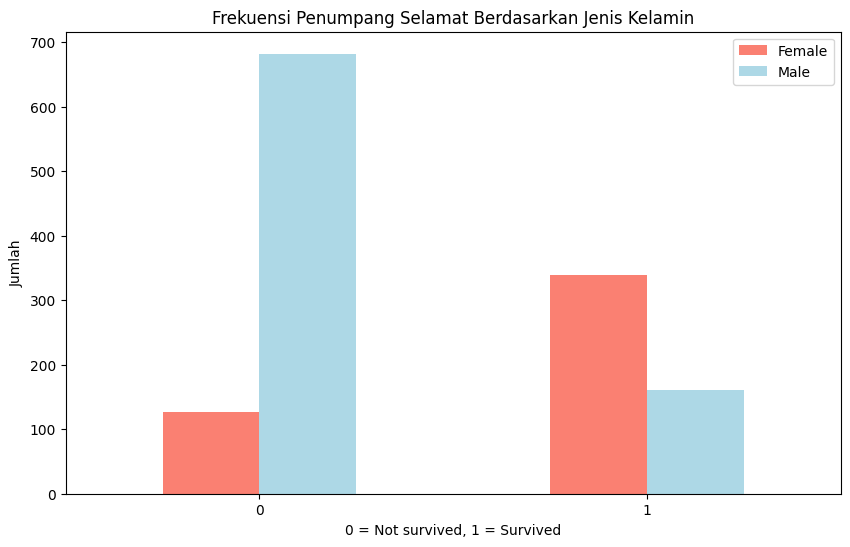

In [ ]:
# Membuat crosstab
pd.crosstab(pandas_df.survived, pandas_df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Frekuensi Penumpang Selamat Berdasarkan Jenis Kelamin")
plt.xlabel("0 = Not survived, 1 = Survived")
plt.ylabel("Jumlah")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

# Pemodelan



> Fitur (feature) dalam konteks machine learning adalah variabel atau atribut yang digunakan untuk membuat prediksi atau pengklasifikasian. Misalnya fitur - fitur seperti kelas penumpang (pclass), umur (age), biaya tiket (fare) akan digunakan oleh model untuk memprediksi apakah seorang penumpang selamat atau tidak.

In [ ]:
# Memilih kolom-kolom fitur
feature_columns = ["pclass", "age", "fare", "sibsp"]

# Menghapus baris yang memiliki nilai null di kolom fitur
df_titanic_cleaned = df.na.drop(subset=feature_columns)

# Menampilkan beberapa baris pertama dari DataFrame yang telah dibersihkan
df_titanic_cleaned.show(5)


+------+--------+--------------------+------+----+-----+-----+------+--------+-------+--------+----+----+--------------------+
|pclass|survived|                name|   sex| age|sibsp|parch|ticket|    fare|  cabin|embarked|boat|body|           home.dest|
+------+--------+--------------------+------+----+-----+-----+------+--------+-------+--------+----+----+--------------------+
|     1|       1|Allen, Miss. Elis...|female|29.0|    0|    0| 24160|211.3375|     B5|       S|   2|NULL|        St Louis, MO|
|     1|       1|Allison, Master. ...|  male|0.92|    1|    2|113781|  151.55|C22 C26|       S|  11|NULL|Montreal, PQ / Ch...|
|     1|       0|Allison, Miss. He...|female| 2.0|    1|    2|113781|  151.55|C22 C26|       S|NULL|NULL|Montreal, PQ / Ch...|
|     1|       0|Allison, Mr. Huds...|  male|30.0|    1|    2|113781|  151.55|C22 C26|       S|NULL| 135|Montreal, PQ / Ch...|
|     1|       0|Allison, Mrs. Hud...|female|25.0|    1|    2|113781|  151.55|C22 C26|       S|NULL|NULL|Montre

> Dalam Pyspark, untuk mendefinidikan kolom fitur menggunakan VectorAssembler untuk menggabungkan fitur - fitur menjadi 1 vektor fitur yang akan digunakan oleh model.

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Inisialisasi VectorAssembler
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transformasikan DataFrame dengan VectorAssembler
df_titanic_vector = vector_assembler.transform(df_titanic_cleaned)

# Menampilkan beberapa baris pertama dari DataFrame yang telah di-transformasi
df_titanic_vector.select("features", *feature_columns).show(5, truncate=False)


+-----------------------+------+----+--------+-----+
|features               |pclass|age |fare    |sibsp|
+-----------------------+------+----+--------+-----+
|[1.0,29.0,211.3375,0.0]|1     |29.0|211.3375|0    |
|[1.0,0.92,151.55,1.0]  |1     |0.92|151.55  |1    |
|[1.0,2.0,151.55,1.0]   |1     |2.0 |151.55  |1    |
|[1.0,30.0,151.55,1.0]  |1     |30.0|151.55  |1    |
|[1.0,25.0,151.55,1.0]  |1     |25.0|151.55  |1    |
+-----------------------+------+----+--------+-----+
only showing top 5 rows



> Kode dibawah berikut bertujuan untuk membuat DataFrame baru yang hanya berisi 2 kolom yang dipilih yaitu kolom fitur (Features) dan kolom (survived), kemudian ditampilkan untuk dianalisis lebih lanjut.

In [ ]:
modeldata = df_titanic_vector.select('features', 'survived')
modeldata.show()

+--------------------+--------+
|            features|survived|
+--------------------+--------+
|[1.0,29.0,211.337...|       1|
|[1.0,0.92,151.55,...|       1|
|[1.0,2.0,151.55,1.0]|       0|
|[1.0,30.0,151.55,...|       0|
|[1.0,25.0,151.55,...|       0|
|[1.0,48.0,26.55,0.0]|       1|
|[1.0,63.0,77.9583...|       1|
|  [1.0,39.0,0.0,0.0]|       0|
|[1.0,53.0,51.4792...|       1|
|[1.0,71.0,49.5042...|       0|
|[1.0,47.0,227.525...|       0|
|[1.0,18.0,227.525...|       1|
| [1.0,24.0,69.3,0.0]|       1|
|[1.0,26.0,78.85,0.0]|       1|
| [1.0,80.0,30.0,0.0]|       1|
|[1.0,24.0,247.520...|       0|
|[1.0,50.0,247.520...|       1|
|[1.0,32.0,76.2917...|       1|
|[1.0,36.0,75.2417...|       0|
|[1.0,37.0,52.5542...|       1|
+--------------------+--------+
only showing top 20 rows



> Melatih model machine learning, diperlukan split data untuk menguji kinerja model secara lebih obyektif.

In [ ]:
# split data 80% train 20% test
train_data,test_data= modeldata.randomSplit([0.8,0.2], seed=42)
train_data.show()

+--------------------+--------+
|            features|survived|
+--------------------+--------+
|[1.0,0.92,151.55,...|       1|
|[1.0,2.0,151.55,1.0]|       0|
| [1.0,6.0,134.5,0.0]|       1|
|[1.0,11.0,120.0,1.0]|       1|
|[1.0,13.0,262.375...|       1|
|[1.0,15.0,211.337...|       1|
|[1.0,16.0,57.9792...|       1|
| [1.0,16.0,86.5,0.0]|       1|
| [1.0,17.0,47.1,0.0]|       0|
| [1.0,17.0,57.0,1.0]|       1|
|[1.0,17.0,110.883...|       1|
| [1.0,18.0,53.1,1.0]|       1|
| [1.0,18.0,60.0,1.0]|       1|
|[1.0,18.0,79.65,0.0]|       1|
|[1.0,18.0,108.9,1.0]|       0|
|[1.0,18.0,262.375...|       1|
|[1.0,19.0,26.2833...|       1|
| [1.0,19.0,30.0,0.0]|       1|
|[1.0,19.0,91.0792...|       1|
|[1.0,19.0,263.0,3.0]|       0|
+--------------------+--------+
only showing top 20 rows



## Naive Bayes ##

In [ ]:
# naive bayes model
from pyspark.ml.classification import NaiveBayes

In [ ]:
nb = NaiveBayes(featuresCol='features', labelCol='survived')

In [ ]:
nb=nb.fit(train_data)

In [ ]:
# prediction
y_pred = nb.transform(test_data)
y_pred.show()

+--------------------+--------+--------------------+--------------------+----------+
|            features|survived|       rawPrediction|         probability|prediction|
+--------------------+--------+--------------------+--------------------+----------+
|[1.0,4.0,81.8583,...|       1|[-73.787877074647...|[1.70444375321975...|       1.0|
|[1.0,14.0,120.0,1.0]|       1|[-116.65376893002...|[2.60722816411926...|       1.0|
| [1.0,16.0,39.4,0.0]|       1|[-46.872130881817...|[0.00156374569382...|       1.0|
|[1.0,17.0,108.9,1.0]|       1|[-109.52533906596...|[2.99801113261934...|       1.0|
|[1.0,18.0,227.525...|       1|[-207.81978312192...|[3.67060009523341...|       1.0|
| [1.0,19.0,53.1,1.0]|       0|[-64.940995040925...|[6.51501343105676...|       1.0|
|[1.0,21.0,77.9583...|       1|[-81.949048399202...|[2.63180092726332...|       1.0|
| [1.0,22.0,66.6,1.0]|       1|[-78.057784458796...|[2.16460247340829...|       1.0|
| [1.0,24.0,60.0,1.0]|       0|[-73.963878997616...|[3.9267654464

> Perintah groupBy('survived', 'prediction'), digunakan untuk mengelompokan data berdasarkan kolom *survived* sebagai label aktual dan *prediction* sebagai tabel prediksi model, dan *count* sebagai jumlah kemunculan setiap kombinasi label aktual dan prediksi model.

In [ ]:
# confusion matrix
y_pred.groupBy('survived', 'prediction').count().show()

+--------+----------+-----+
|survived|prediction|count|
+--------+----------+-----+
|       1|       0.0|   34|
|       0|       0.0|   89|
|       1|       1.0|   34|
|       0|       1.0|   18|
+--------+----------+-----+



In [ ]:
from sklearn.metrics import confusion_matrix
pred=y_pred.select("prediction").collect()
orig=y_pred.select("survived").collect()
print(confusion_matrix(orig, pred))

[[89 18]
 [34 34]]


>Dalam konteks data Titanic, confusion matrix akan memberikan gambaran tentang seberapa baik model kamu dalam memprediksi apakah seorang penumpang selamat atau tidak selamat.

> Confusion matrix memiliki:

1. True Positive (TP): Jumlah penumpang yang sebenarnya selamat dan diprediksi selamat dengan benar terdapat 89.
2. True Negative (TN): Jumlah penumpang yang sebenarnya tidak selamat dan diprediksi tidak selamat dengan benar terdapat 34.
3. False Positive (FP): Jumlah penumpang yang sebenarnya tidak selamat, tetapi diprediksi selamat (kesalahan prediksi positif palsu) terdapat 34.
4. False Negative (FN): Jumlah penumpang yang sebenarnya selamat, tetapi diprediksi tidak selamat (kesalahan prediksi negatif palsu) terdapat 18.

> Untuk penjelasan mengenai tabel konfusi matriks dapat dilihat pada
[link ini](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

# Evaluasi Model

> Metode evaluasi model digunakan untuk mengukur seberapa baik kinerja model yang telah dibangun.

In [ ]:
# evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
eval= MulticlassClassificationEvaluator(
    labelCol='survived', predictionCol='prediction')

In [ ]:
akurasi = eval.evaluate(y_pred)
akurasi

0.6933830227743272

Hasil evaluasi dengan naive bayes didapatkan 0,69 dari data uji. Dengan kata lain, dari semua penumpang yang dievaluasi model berhasil memprediksi 69% secara benar.

## Decision Tree ##

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol='survived', featuresCol='features')
dt_model = dt.fit(train_data)
dt_model


DecisionTreeClassificationModel: uid=DecisionTreeClassifier_a5824dbab337, depth=5, numNodes=39, numClasses=2, numFeatures=4

In [ ]:
predict_dt = dt_model.transform(test_data)
predict_dt


DataFrame[features: vector, survived: int, rawPrediction: vector, probability: vector, prediction: double]

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
ev = MulticlassClassificationEvaluator(labelCol="survived")

In [ ]:
akurasi_dt = ev.evaluate(predict_dt)
akurasi_dt

0.6849001451576558

Hasil evaluasi dengan decision tree didapatkan 0,68 dari data uji. Dengan kata lain, dari semua penumpang yang dievaluasi model berhasil memprediksi 68% secara benar.